In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


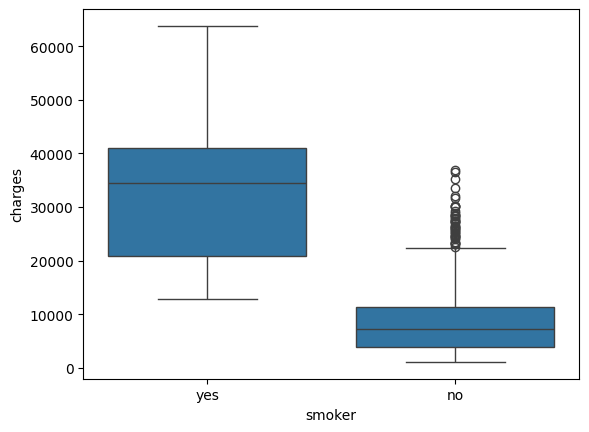

In [5]:
plt.figure()
sns.boxplot(data=df, x='smoker', y='charges')
plt.show()

# Feature Engineering ---> Encoding -> One hot encoding

In [6]:
df_encoded = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

print("Original DataFrame (df):")
display(df.head())

print("\nEncoded DataFrame (df_encoded):")
display(df_encoded.head())

Original DataFrame (df):


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Encoded DataFrame (df_encoded):


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


# Model Development

In [7]:
x = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()

model.fit(x_train, y_train) # modeli eğitme

y_pred = model.predict(x_test) # tahmin etme

# Evaluation

In [8]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Skoru: {r2:.4f}")
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")

R2 Skoru: 0.7819
Ortalama Kare Hata (MSE): 32009896.15


# **Model Improvement Study**

In [9]:
df_encoded_new = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df_encoded_new['bmi_smoker'] = df_encoded_new['bmi'] * df_encoded_new['smoker_yes']
df_encoded_new['is_obese'] = df_encoded_new['bmi'].apply(lambda x:1 if x>30 else 0)

x_new = df_encoded_new.drop('charges', axis=1)
y_new = df_encoded_new['charges']

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2)

model_new = LinearRegression()
model_new.fit(x_train_new, y_train_new) # modeli eğitme
y_pred_new = model_new.predict(x_test_new) # tahmin etme

r2_new = r2_score(y_test_new, y_pred_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)

print(f"R2 Skoru: {r2_new:.4f}")
print(f"Ortalama Kare Hata (MSE): {mse_new:.2f}")

R2 Skoru: 0.8391
Ortalama Kare Hata (MSE): 24516196.61
